In [1]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

#Models ML
from sklearn.svm import SVC
#Metrics
from sklearn.metrics import confusion_matrix,accuracy_score
# from sklearn.metrics import mean_squared_error,r2_score
# from sklearn.metrics import roc_curve, auc

In [3]:
data = pd.read_csv('loan_data.csv')
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
data['person_home_ownership'].value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [5]:
data['loan_intent'].value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [6]:
data['previous_loan_defaults_on_file'].value_counts()

previous_loan_defaults_on_file
Yes    22858
No     22142
Name: count, dtype: int64

In [7]:
row,col = data.shape
print("No of row = ",row)
print("No of col = ",col)


No of row =  45000
No of col =  14


In [8]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [9]:
data = data.dropna()

In [10]:
data.shape

(45000, 14)

In [11]:
# data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [12]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()

data["person_gender"] = ord_enc.fit_transform(data[["person_gender"]]).astype('int')
data["person_education"] = ord_enc.fit_transform(data[["person_education"]]).astype('int')
data["person_home_ownership"] = ord_enc.fit_transform(data[["person_home_ownership"]]).astype('int')
data["loan_intent"] = ord_enc.fit_transform(data[["loan_intent"]]).astype('int')
data["previous_loan_defaults_on_file"] = ord_enc.fit_transform(data[["previous_loan_defaults_on_file"]]).astype('int')
data["loan_status"] = ord_enc.fit_transform(data[["loan_status"]]).astype('int') # yo pani change garem kina ki yo string ma aayo like 00 and 1.0 ma

In [13]:
data['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [14]:
df1 = data[data['loan_status'] == 0].sample(frac = 1).iloc[0:10000]
df2 = data[data['loan_status'] == 1]


In [15]:
data = pd.concat([df1,df2],axis = 0).sample(frac=1)
data  # ek choti full data rakhera check garam hai ta( rakheko confusion matrix naramro aayo)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
7480,24.0,0,0,64519.0,0,0,6400.0,1,13.67,0.10,2.0,640,1,0
43129,25.0,1,3,24290.0,2,3,5000.0,5,9.79,0.21,3.0,553,0,1
2217,22.0,0,3,49427.0,0,3,13225.0,4,16.77,0.27,2.0,637,0,1
19022,27.0,1,0,48890.0,5,3,2000.0,0,10.75,0.04,6.0,584,0,0
25453,33.0,1,1,87671.0,12,3,12000.0,3,11.99,0.14,5.0,636,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31973,37.0,1,1,73335.0,17,3,10000.0,3,15.99,0.14,17.0,714,0,1
28304,27.0,1,3,78865.0,1,0,18000.0,4,7.51,0.23,5.0,600,0,0
30728,48.0,0,3,69069.0,26,0,15000.0,0,11.14,0.22,11.0,611,0,1
20307,30.0,1,1,116131.0,8,3,4000.0,5,10.75,0.03,5.0,684,1,0


In [16]:
# data = data.iloc[:,2:] # aba yesma hataunu parne xaina kei ni so yo parena hatauna

In [17]:
data['person_gender'].value_counts()  # baki ko gareni bhayo check garna man lagesi

person_gender
1    11099
0     8901
Name: count, dtype: int64

In [18]:
data = data.sample(frac = 1)

In [19]:
data

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44599,26.0,1,3,80453.0,3,0,13752.0,3,12.05,0.17,5.0,560,0,1
8684,23.0,0,1,65683.0,0,0,21200.0,1,12.42,0.32,2.0,600,0,1
26009,30.0,1,1,114848.0,7,0,4000.0,4,5.99,0.03,9.0,587,1,0
35923,27.0,0,0,76571.0,0,3,18000.0,1,10.39,0.24,8.0,610,1,0
4693,23.0,1,0,61200.0,0,3,4900.0,1,8.49,0.08,3.0,555,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44518,28.0,0,4,70629.0,5,3,13716.0,3,12.88,0.19,9.0,714,0,1
39404,28.0,0,3,150989.0,5,3,10000.0,5,9.65,0.07,9.0,546,1,0
26718,32.0,1,4,133102.0,6,0,23000.0,5,11.48,0.17,9.0,668,1,0
5862,24.0,0,0,45479.0,6,3,5500.0,5,15.05,0.12,4.0,696,0,1


In [20]:
data.corr()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
person_age,1.000000,0.014915,-0.015024,0.149739,0.952506,-0.047499,0.066839,0.007442,0.018694,-0.045777,0.874388,0.177404,-0.006959,-0.024098
person_gender,0.014915,1.000000,-0.006489,0.011737,0.013702,-0.004758,0.003887,-0.009197,0.006237,-0.002591,0.010531,-0.000298,0.006545,-0.006942
person_education,-0.015024,-0.006489,1.000000,0.001815,-0.013872,-0.004170,-0.007769,-0.004218,0.000276,-0.016227,-0.015236,0.006605,0.001639,-0.001219
person_income,0.149739,0.011737,0.001815,1.000000,0.141810,-0.313078,0.325442,-0.003308,0.003493,-0.303855,0.129891,0.024064,0.159759,-0.220891
person_emp_exp,0.952506,0.013702,-0.013872,0.141810,1.000000,-0.045817,0.060299,0.009113,0.022807,-0.042047,0.836126,0.186047,-0.011455,-0.021459
person_home_ownership,-0.047499,-0.004758,-0.004170,-0.313078,-0.045817,1.000000,-0.103027,0.014499,0.117664,0.227599,-0.031152,0.004578,-0.199790,0.287366
loan_amnt,0.066839,0.003887,-0.007769,0.325442,0.060299,-0.103027,1.000000,-0.002996,0.143752,0.584837,0.054836,0.019005,-0.081574,0.116735
loan_intent,0.007442,-0.009197,-0.004218,-0.003308,0.009113,0.014499,-0.002996,1.000000,-0.017115,0.013469,0.010861,0.021171,0.053547,-0.080221
loan_int_rate,0.018694,0.006237,0.000276,0.003493,0.022807,0.117664,0.143752,-0.017115,1.000000,0.082048,0.023823,0.024823,-0.264004,0.372810
loan_percent_income,-0.045777,-0.002591,-0.016227,-0.303855,-0.042047,0.227599,0.584837,0.013469,0.082048,1.000000,-0.033054,-0.006239,-0.279777,0.401646


In [21]:
data = data.drop(['person_age','person_gender','person_education','person_emp_exp','cb_person_cred_hist_length','credit_score'], axis = 1)
data

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
44599,80453.0,0,13752.0,3,12.05,0.17,0,1
8684,65683.0,0,21200.0,1,12.42,0.32,0,1
26009,114848.0,0,4000.0,4,5.99,0.03,1,0
35923,76571.0,3,18000.0,1,10.39,0.24,1,0
4693,61200.0,3,4900.0,1,8.49,0.08,1,0
...,...,...,...,...,...,...,...,...
44518,70629.0,3,13716.0,3,12.88,0.19,0,1
39404,150989.0,3,10000.0,5,9.65,0.07,1,0
26718,133102.0,0,23000.0,5,11.48,0.17,1,0
5862,45479.0,3,5500.0,5,15.05,0.12,0,1


In [22]:
data.corr()

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
person_income,1.000000,-0.313078,0.325442,-0.003308,0.003493,-0.303855,0.159759,-0.220891
person_home_ownership,-0.313078,1.000000,-0.103027,0.014499,0.117664,0.227599,-0.199790,0.287366
loan_amnt,0.325442,-0.103027,1.000000,-0.002996,0.143752,0.584837,-0.081574,0.116735
loan_intent,-0.003308,0.014499,-0.002996,1.000000,-0.017115,0.013469,0.053547,-0.080221
loan_int_rate,0.003493,0.117664,0.143752,-0.017115,1.000000,0.082048,-0.264004,0.372810
loan_percent_income,-0.303855,0.227599,0.584837,0.013469,0.082048,1.000000,-0.279777,0.401646
previous_loan_defaults_on_file,0.159759,-0.199790,-0.081574,0.053547,-0.264004,-0.279777,1.000000,-0.696500
loan_status,-0.220891,0.287366,0.116735,-0.080221,0.372810,0.401646,-0.696500,1.000000


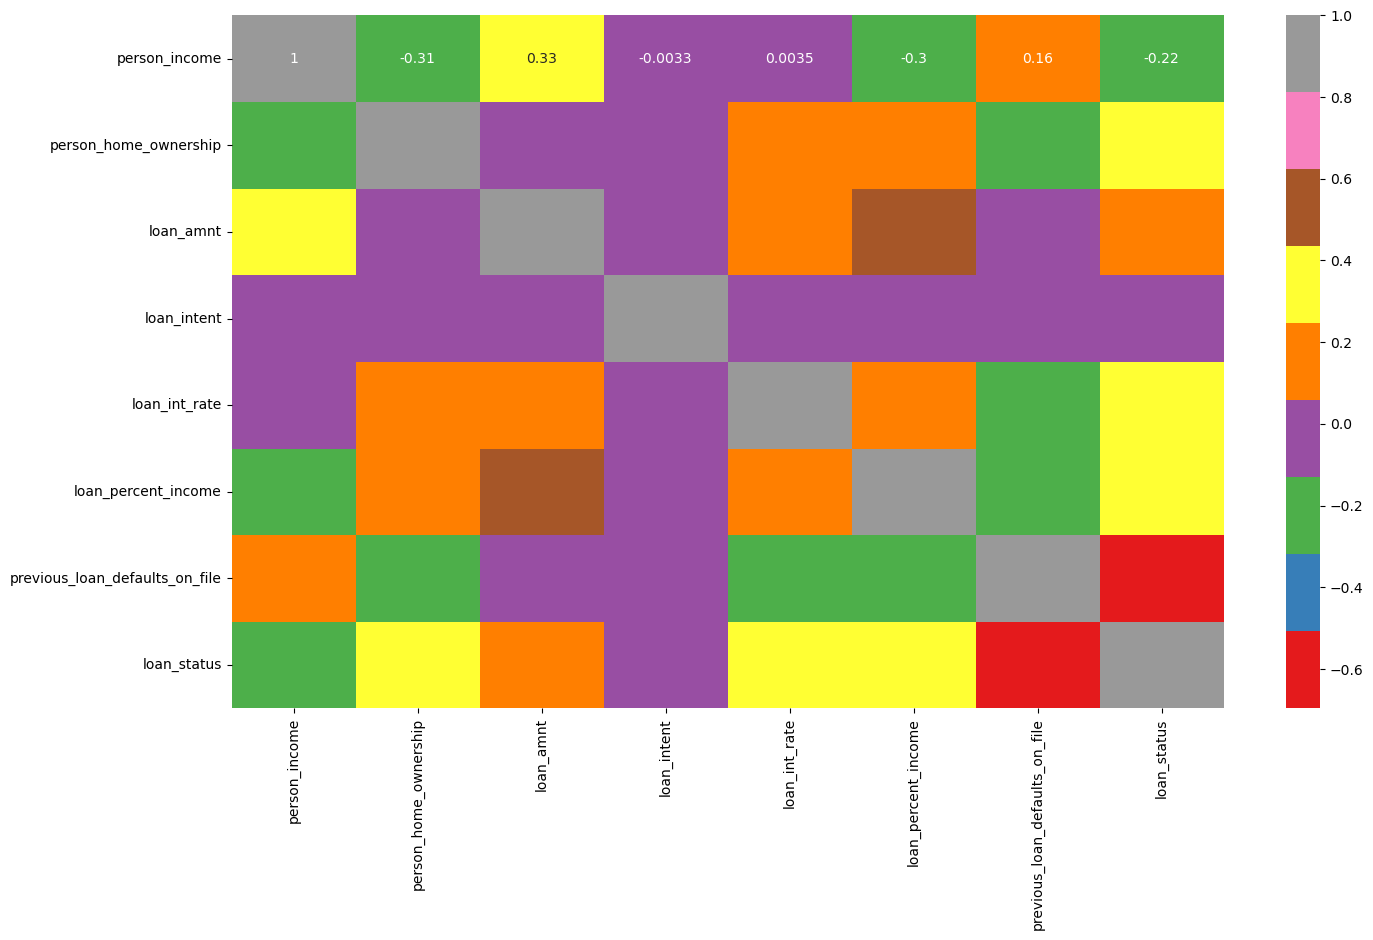

In [23]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [24]:
data.columns

Index(['person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [25]:
# training and normalization of data
X = data[['person_income', 'person_home_ownership', 'loan_amnt', 'loan_intent','loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']]
Y = data['loan_status']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [26]:
from sklearn.svm import SVC
svc= SVC()
svc.fit(X_train,Y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [27]:
# # #Creating pickle file
import pickle
with open('Loan.pickle', 'wb') as f:
    pickle.dump(svc, f)

In [28]:
X_test

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file
24453,65511.0,3,10000.0,4,5.42,0.15,1
17439,45287.0,3,14000.0,4,9.88,0.31,0
7771,44117.0,3,7000.0,5,10.65,0.16,0
29318,81086.0,3,20000.0,1,14.59,0.25,1
461,22366.0,2,6250.0,5,10.62,0.28,0
...,...,...,...,...,...,...,...
23925,34232.0,3,10000.0,0,10.37,0.29,0
522,65946.0,3,21600.0,5,13.49,0.33,0
1087,87591.0,3,17600.0,3,17.19,0.20,0
28966,78152.0,3,10000.0,2,12.69,0.13,0


In [29]:
Y_pred = svc.predict(X_test)
Y_pred



array([0, 1, 1, ..., 0, 0, 1])

In [30]:
Y_test

24453    0
17439    1
7771     0
29318    0
461      1
        ..
23925    1
522      1
1087     1
28966    0
29490    0
Name: loan_status, Length: 4000, dtype: int32

In [31]:
#test aucc
svc_accuracy= round(accuracy_score(Y_test,Y_pred)*100,2) # Test Accuracy
svc_accuracy

70.23

In [32]:
#train aucc
Y_train_pred = svc.predict(X_train)
svc_accuracy= round(accuracy_score(Y_train,Y_train_pred), 2)*100 # Accuracy
svc_accuracy

70.0

In [33]:
data

,person_income,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
44599,80453.0,0,13752.0,3,12.05,0.17,0,1
8684,65683.0,0,21200.0,1,12.42,0.32,0,1
26009,114848.0,0,4000.0,4,5.99,0.03,1,0
35923,76571.0,3,18000.0,1,10.39,0.24,1,0
4693,61200.0,3,4900.0,1,8.49,0.08,1,0
...,...,...,...,...,...,...,...,...
44518,70629.0,3,13716.0,3,12.88,0.19,0,1
39404,150989.0,3,10000.0,5,9.65,0.07,1,0
26718,133102.0,0,23000.0,5,11.48,0.17,1,0
5862,45479.0,3,5500.0,5,15.05,0.12,0,1


In [34]:
#Cough_symptoms Fever   Sore_throat     Shortness_of_breath     Headache        Known_contact
person_income = float(input("Enter person_income = "))
person_home_ownership = int(input(" person_home_ownership Ente r0 MORTGAGE 1 for OTHER 2 FOR OWN 3 FOR RENT = "))
loan_amnt = float(input(" loan_amnt Enter = "))
loan_intent = int(input(" loan_intent Enter 0 for DEBTCONSOLIDATION 1 for EDUCATION 2 for HOMEIMPROVEMENT 3 for MEDICAL 4 for PERSONAL 5 for VENTURE    = "))
loan_int_rate = float(input(" loan_int_rate Enter = "))
loan_percent_income = float(input(" loan_percent_income Enter = "))
previous_loan_defaults_on_file = int(input(" previous_loan_defaults_on_file Enter 1 for YES 0 for NO ="))

new_data = {'person_income':[person_income],
            'person_home_ownership':[person_home_ownership],
            'loan_amnt':[loan_amnt],
            'loan_intent':[loan_intent],
            'loan_int_rate':[loan_int_rate],
            'loan_percent_income':[loan_percent_income],
            'previous_loan_defaults_on_file':[previous_loan_defaults_on_file],
           }
d = pd.DataFrame(new_data)

Enter person_income =  5000
 person_home_ownership Ente r0 MORTGAGE 1 for OTHER 2 FOR OWN 3 FOR RENT =  3
 loan_amnt Enter =  50000
 loan_intent Enter 0 for DEBTCONSOLIDATION 1 for EDUCATION 2 for HOMEIMPROVEMENT 3 for MEDICAL 4 for PERSONAL 5 for VENTURE    =  3
 loan_int_rate Enter =  0.11
 loan_percent_income Enter =  0.2
 previous_loan_defaults_on_file Enter 1 for YES 0 for NO = 0


In [35]:
Y_score = svc.predict(d)
Y_score

array([1])

In [36]:
if Y_score[0] == 1:
  print("Positive")
else:
  print("Negative")

Positive


In [37]:
Y_pred = svc.predict(X_test)
Y_pred

array([0, 1, 1, ..., 0, 0, 1])

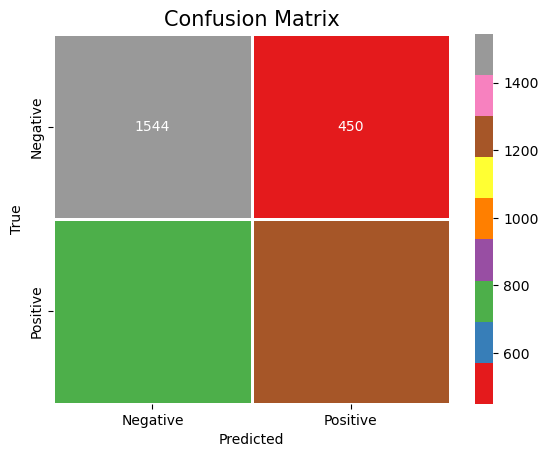

In [38]:
# def impressions(model,accuracy):
# print('Mean squared error: ', round(mean_squared_error(Y_test,Y_pred),3))
cm=confusion_matrix(Y_test,Y_pred)
class_label = ["Negative", "Positive"]

df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm,annot=True,cmap='Set1',linewidths=1,fmt='d')
plt.title("Confusion Matrix",fontsize=15)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [39]:
from sklearn.metrics import classification_report, confusion_matrix
ytest = np.array(Y_test)
print(classification_report(ytest,svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1994
           1       0.74      0.63      0.68      2006

    accuracy                           0.70      4000
   macro avg       0.71      0.70      0.70      4000
weighted avg       0.71      0.70      0.70      4000

